# Machine Intelligence II - Team MensaNord
## Sheet 11

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [156]:
%reset -f
from __future__ import division, print_function
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import multivariate_normal
import seaborn as sns
from sklearn.cluster import KMeans


### Exercise 2


#### 1.1

In [157]:
w1, w2 = [2,2], [1,1]
sigma1, sigma2 = 0.7, 0.2
N = 100
P1, P2 = 2/3, 1/3
theta = 0.001

In [158]:
X, m  = np.zeros((N, 2)), np.zeros((N, 2))
for n in range(N):
    if np.random.rand() < P1:
        X[n] = np.random.multivariate_normal(w1, np.eye(len(w1)) * sigma1**2)
        m[n] = [1,0]
    else:
        X[n] = np.random.multivariate_normal(w2, np.eye(len(w2)) * sigma2**2)
        m[n] = [0,1]

In [161]:
def create_data(sigma1, sigma2 = 0.2):
    X, m  = np.zeros((N, 2)), np.zeros((N, 2))
    for n in range(N):
        if np.random.rand() < P1:
            X[n] = np.random.multivariate_normal(w1, np.eye(len(w1)) * sigma1**2)
            m[n] = [1,0]
        else:
            X[n] = np.random.multivariate_normal(w2, np.eye(len(w2)) * sigma2**2)
            m[n] = [0,1]
    return X, m

In [162]:
X, m = create_data(0.7)

#### 1.2 EM algorithm

In [174]:
%pdb

Automatic pdb calling has been turned OFF


In [175]:
#EM Algorithm:
M = 2
P_prior = np.ones(2)*1/M
P_likelihood = np.zeros((N,M))
P_posterior = np.zeros((M,N))
mu = X.mean(axis = 0)
w = np.array([mu + np.random.rand(M)-0.5, mu + np.random.rand(M)-0.5])
var = np.mean([np.linalg.norm(x - mu)**2 for x in X])
sigma = np.array([var + np.random.rand()-0.5,var + np.random.rand()-0.5])

distance = np.inf

while distance > theta:
    w_old = w.copy()
    sigma_old = sigma.copy()
    P_prior_old = P_prior.copy()
    for (alpha, q), _ in np.ndenumerate(P_likelihood):
        P_likelihood[alpha, q] = multivariate_normal.pdf(X[alpha], w[q], sigma[q])

    for (q, alpha), _ in np.ndenumerate(P_posterior):
        P_posterior[q, alpha] = (P_likelihood[alpha, q] * P_prior[q]) / np.sum([P_likelihood[alpha, r] * P_prior[r] for r in range(M)])
        
    distance = 0
    for q in range(M):
        w[q] = np.sum([P_posterior[q, alpha] * X[alpha] for alpha in range(N)]) / np.sum(P_posterior[q])
        distance = max(distance, np.linalg.norm(w[q] - w_old[q]))
        
        sigma[q] = 1/N * np.sum([np.linalg.norm(X[alpha] - w[q]) ** 2 * P_posterior[q, alpha] for alpha in range(N)]) / np.sum(P_posterior[q])
        distance = max(distance, np.abs(sigma[q] - sigma_old[q]))
        
        P_prior[q] = P_posterior[q].mean()
        distance = max(distance, np.abs(P_prior[q] - P_prior_old[q]))
#     print(w, sigma, P_prior)
    print(distance)
    

2.34487775442
3.79307952526
4.6655558441
1.91080489046
1.793643621
2.42440081888
5.01150308161
2.39116415737
1.63537400226
2.1125963602
4.27916081521
1.14020222869
1.74153372012
3.40738339822
2.82388316859
1.46049152631
4.92818048196
2.36770495708
1.46533691953
1.6651972433
3.70768874691
1.60572878962
2.78551794591
5.0165505563
2.21034035778
1.69962892589
2.7654476655
5.01787869501
2.2125801137
1.70001302409
2.7663889666
5.01782089028
2.21246488169
1.69999519745
2.76633938969
5.01782402189
2.21247099254
1.69999614815
2.76634201431
5.01782385635
2.21247066916
1.69999609785
2.76634187541
5.01782386511
2.21247068627
1.69999610051
2.76634188276
5.01782386465
2.21247068537
1.69999610037
2.76634188237
5.01782386467
2.21247068541
1.69999610038
2.76634188239
5.01782386467
2.21247068541
1.69999610038
2.76634188239
5.01782386467
2.21247068541
1.69999610038
2.76634188239
5.01782386467
2.21247068541
1.69999610038
2.76634188239
5.01782386467
2.21247068541
1.69999610038
2.76634188239
5.01782386467
2

KeyboardInterrupt: 

#### 1.3

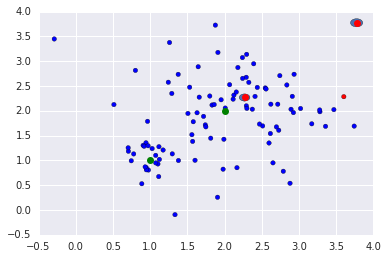

In [152]:
pred_EM = P_posterior.argmax(axis = 0)
plt.scatter(*X.T, c = ['r' if p==1 else 'b' for p in pred_EM])
plt.plot(w[0][0],w[0][1],'ro')
plt.plot(w[1][0],w[1][1],'ro')
plt.gca().add_artist(plt.Circle(w[0], sigma[0]))
plt.gca().add_artist(plt.Circle(w[1], sigma[1]))
plt.plot(w1[0],w1[1],'go')
plt.plot(w2[0],w2[1],'go')


In [132]:
km = KMeans(2)
km.fit(X)
centers = km.cluster_centers_
preds = km.predict(X)

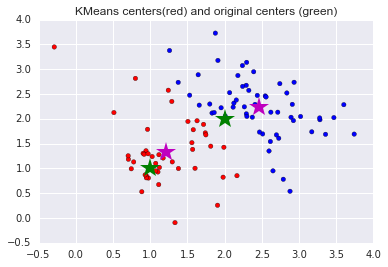

In [154]:
plt.figure()
plt.scatter(*X.T, c = ['r' if p==1 else 'b' for p in preds])
plt.plot(centers[0][0],centers[0][1],'m*', markersize = 20)
plt.plot(centers[1][0],centers[1][1],'m*', markersize = 20)
plt.plot(w1[0],w1[1],'g*', markersize = 20)
plt.plot(w2[0],w2[1],'g*', markersize = 20)
plt.title('KMeans centers(red) and original centers (green)')

#### 1.4

In [ ]:
sigma1 = [0.1, 0.5, 1, 1.5]
for s1 in sigma1:
    X, m = create_data(s1, sigma2=0.2)
    